In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [22]:
## mount error 나는 경우 
#!fusermount -u gdrive
#!google-drive-ocamlfuse gdrive

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
fusermount: bad mount point gdrive: Transport endpoint is not connected
shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
/bin/bash: google-drive-ocamlfuse: command not found


In [2]:
ls

gdrive/  sample_data/


In [3]:
!pip install tensorboardcolab
from tensorboardcolab import TensorBoardColab, TensorBoardColabCallback

tbc=TensorBoardColab()

Using TensorFlow backend.


Wait for 8 seconds...
TensorBoard link:
http://dc0d481b.ngrok.io


In [0]:
import os
os.chdir("gdrive/My Drive/big_project")

In [5]:
ls

 cigarette_detection.ipynb                       det.py
 cigarette_detection_plus_non_epochs_100.ipynb   det_sub.py
 cigarette_detection_plus_non.ipynb              images/
'cigarette_detection_plus_non.ipynb의 사본'      Mask_RCNN/
 cigarette_detection_video.ipynb                 multi_class_detection.ipynb
 det_add0.py                                     __pycache__/


In [0]:
# 한번 만 실행하기 
#!git clone https://www.github.com/matterport/Mask_RCNN.git
os.chdir('Mask_RCNN')

In [7]:
#debugging = True
from keras import backend as K
K.clear_session()

W0813 05:35:28.164584 140666824701824 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0813 05:35:28.166529 140666824701824 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0813 05:35:28.214304 140666824701824 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [8]:
import os
import sys 
import json
import datetime
import numpy as np
import skimage.draw
import random
import collections

ROOT_DIR = os.path.abspath('./')
ROOT_IMAGE_DIR = os.path.abspath('../images')

dataset_path = os.path.join(ROOT_IMAGE_DIR, "")
models_dir = os.path.join(ROOT_DIR, "models/")

print("base dataset dir:", dataset_path)
print("base models:", models_dir)

sys.path.append(ROOT_DIR)
from mrcnn.config import Config
from mrcnn import model as modellib, utils

from mrcnn import visualize
from mrcnn.visualize import display_images
from mrcnn.model import log

COCO_WEIGHTS_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")

DEFAULT_LOGS_DIR = os.path.join(ROOT_DIR, "logs")

base dataset dir: /content/gdrive/My Drive/big_project/images/
base models: /content/gdrive/My Drive/big_project/Mask_RCNN/models/


In [0]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as lines
from matplotlib.patches import Polygon

%matplotlib inline

In [0]:
import det as det

In [11]:
print(dataset_path)

/content/gdrive/My Drive/big_project/images/


In [12]:
annotations = json.load(open(os.path.join(dataset_path, "cigarette_images/annotations.json")))
annotations = list(annotations.values())

annotations = [a for a in annotations if a['regions']]

for a in annotations:
    print(a['filename'])

cigarette_0101.jpg
cigarette_0102.jpg
cigarette_0103.jpg
cigarette_0104.jpg
cigarette_0105.jpg
cigarette_0106.jpg
cigarette_0107.jpg
cigarette_0108.jpg
cigarette_0109.jpg
cigarette_0110.jpg
cigarette_0111.jpg
cigarette_0112.jpg
cigarette_0113.jpg
cigarette_0114.jpg
cigarette_0115.jpg
cigarette_0116.jpg
cigarette_0117.jpg
cigarette_0118.jpg
cigarette_0119.jpg
cigarette_0120.jpg
cigarette_0121.jpg
cigarette_0122.jpg
cigarette_0123.jpg
cigarette_0124.jpg
cigarette_0125.jpg
cigarette_0126.jpg
cigarette_0127.jpg
cigarette_0128.jpg
cigarette_0129.jpg
cigarette_0130.jpg
cigarette_0131.jpg
cigarette_0132.jpg
cigarette_0133.jpg
cigarette_0134.jpg
cigarette_0135.jpg
cigarette_0136.jpg
cigarette_0137.jpg
cigarette_0138.jpg
cigarette_0139.jpg
cigarette_0140.jpg
cigarette_0141.jpg
cigarette_0142.jpg
cigarette_0143.jpg
cigarette_0144.jpg
cigarette_0145.jpg
cigarette_0146.jpg
cigarette_0147.jpg
cigarette_0148.jpg
cigarette_0149.jpg
cigarette_0150.jpg
cigarette_0151.jpg
cigarette_0152.jpg
cigarette_01

In [0]:
config = det.DetConfig('cigarette', ['cigarette'])

In [14]:
dataset, _ = det.create_datasets(dataset_path +"/cigarette_images", config)

region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 

In [15]:
dataset.prepare()

print("Image Count: {}".format(len(dataset.image_ids)))
print("Class Count: {}".format(dataset.num_classes))
for i, info in enumerate(dataset.class_info):
    print("{:3}. {:50}".format(i, info['name']))

Image Count: 720
Class Count: 2
  0. BG                                                
  1. cigarette                                         


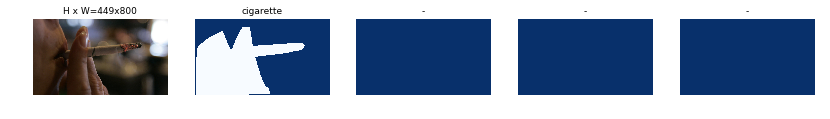

(449, 800, 1)

In [16]:
image_id = 2
image = dataset.load_image(image_id)
mask, class_ids = dataset.load_mask(image_id)
visualize.display_top_masks(image, mask, class_ids, dataset.class_names)
mask.shape

In [17]:
from mrcnn import visualize
from mrcnn.visualize import display_images

image_ids = dataset.image_ids
for image_id in image_ids:
    image = dataset.load_image(image_id)
    mask, class_ids = dataset.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset.class_names)

Output hidden; open in https://colab.research.google.com to view.

image_id 688 /content/gdrive/My Drive/big_project/images//cigarette_images/cigarette_0950.jpg
image                    shape: (675, 1200, 3)        min:    0.00000  max:  255.00000  uint8
mask                     shape: (675, 1200, 1)        min:    0.00000  max:    1.00000  bool
class_ids                shape: (1,)                  min:    1.00000  max:    1.00000  int32
bbox                     shape: (1, 4)                min:  426.00000  max:  666.00000  int32


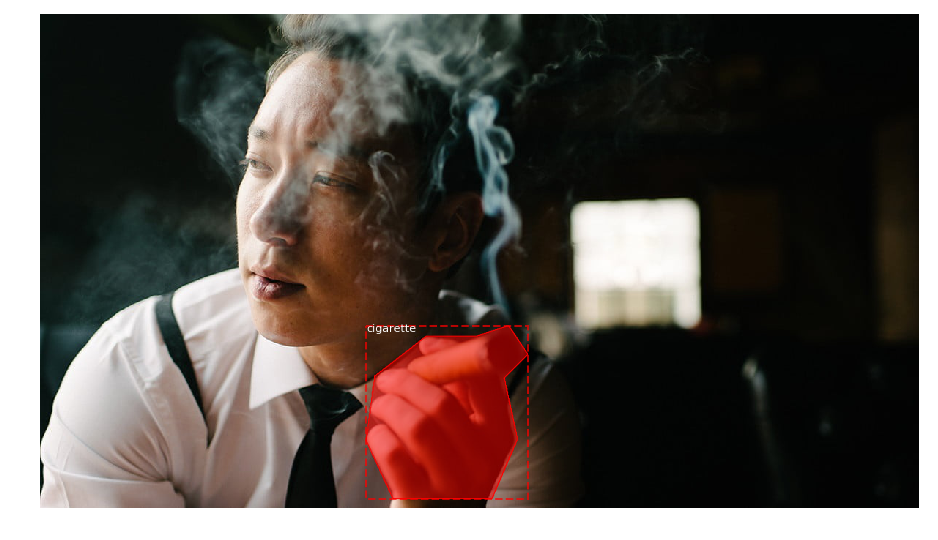

In [0]:
image_id = random.choice(dataset.image_ids)

image = dataset.load_image(image_id)
mask, class_ids = dataset.load_mask(image_id)

bbox = utils.extract_bboxes(mask)

type(mask)

print("image_id", image_id, dataset.image_reference(image_id))
log("image", image)
log("mask", mask)
log("class_ids", class_ids)
log("bbox", bbox)

visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)

image_id:  433 /content/gdrive/My Drive/big_project/images//cigarette_images/cigarette_0984.jpg
Original shape:  (339, 509, 3)
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
mask                     shape: (1024, 1024, 1)       min:    0.00000  max:    1.00000  bool
class_ids                shape: (1,)                  min:    1.00000  max:    1.00000  int32
bbox                     shape: (1, 4)                min:  239.00000  max: 1020.00000  int32


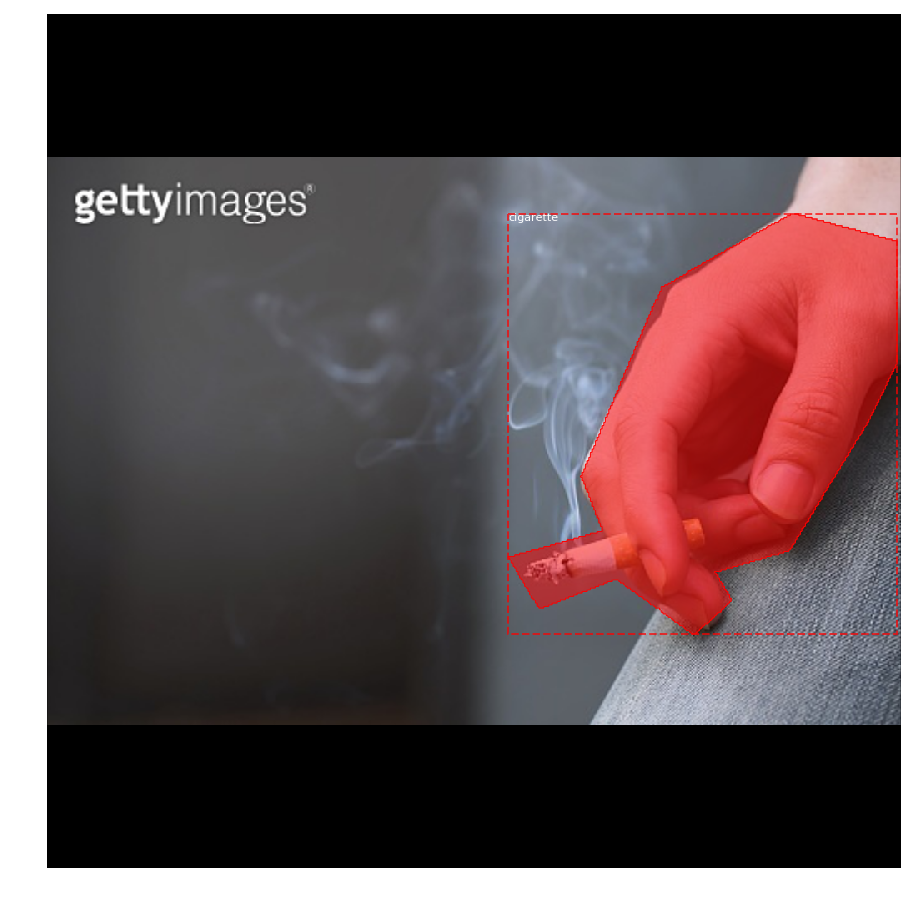

In [0]:
image_id = np.random.choice(dataset.image_ids, 1)[0]
image = dataset.load_image(image_id)
mask, class_ids = dataset.load_mask(image_id)
original_shape = image.shape

image, window, scale, padding, _ = utils.resize_image(
    image,
    min_dim = config.IMAGE_MIN_DIM,
    max_dim = config.IMAGE_MAX_DIM,
    mode = config.IMAGE_RESIZE_MODE
)
mask = utils.resize_mask(mask, scale, padding)

bbox = utils.extract_bboxes(mask)

print("image_id: ", image_id, dataset.image_reference(image_id))
print("Original shape: ", original_shape)
log("image", image)
log("mask", mask)
log("class_ids", class_ids)
log("bbox", bbox)

visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)

image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
mask                     shape: (1024, 1024, 1)       min:    0.00000  max:    1.00000  bool
class_ids                shape: (1,)                  min:    1.00000  max:    1.00000  int32
bbox                     shape: (1, 4)                min:  339.00000  max:  699.00000  int32


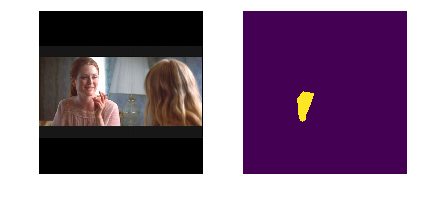

In [0]:
image_id = np.random.choice(dataset.image_ids, 1)[0]
image, image_meta, class_ids, bbox, mask = modellib.load_image_gt(
    dataset, config, image_id, use_mini_mask=False)

log("image", image)
log("mask", mask)
log("class_ids", class_ids)
log("bbox", bbox)

display_images([image]+[mask[:,:,i] for i in range(min(mask.shape[-1], 7))])

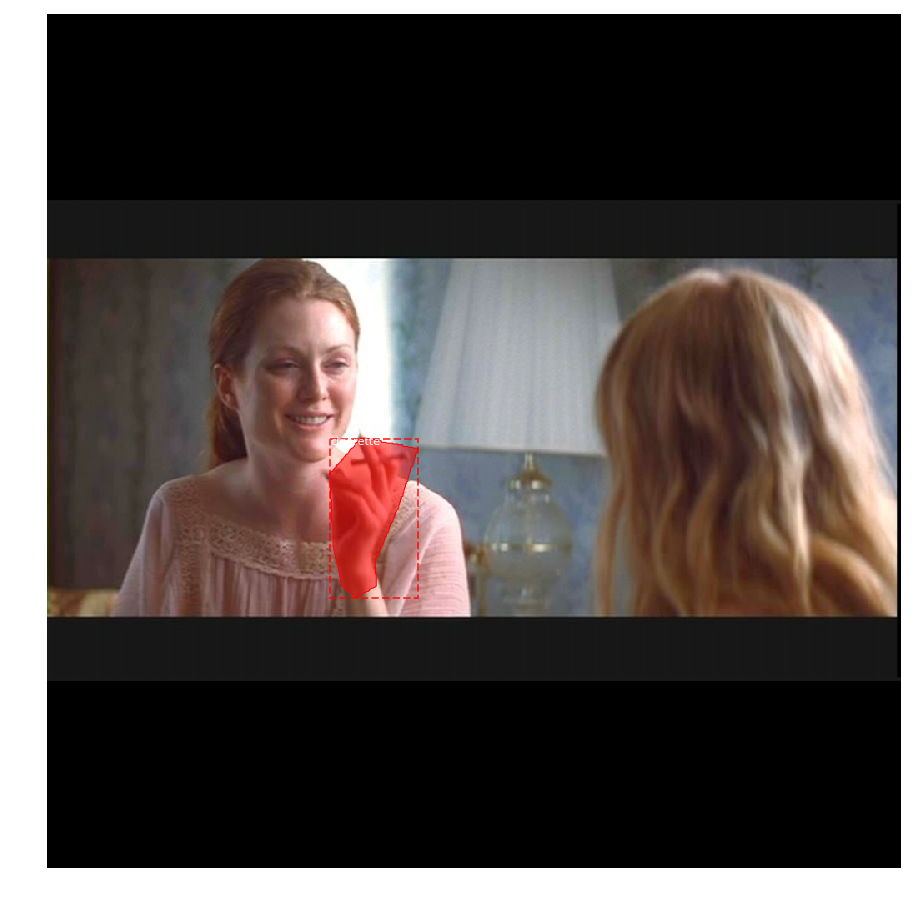

In [0]:
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)

In [0]:
# The imgaug library is pretty flexible and make different types of augmentation possible. 
# The deterministic setting is used because any spatial changes to the image must also be 
# done to the mask. There are also some augmentors that are unsafe to apply. From the mrcnn
# library: 
# Augmentors that are safe to apply to masks: 
# ["Sequential", "SomeOf", "OneOf", "Sometimes","Fliplr", 
# "Flipud", "CropAndPad", "Affine", "PiecewiseAffine"]
# Affine, has settings that are unsafe, so always
# test your augmentation on masks

import imgaug as ia
from imgaug import augmenters as iaa

ia.seed(1)

# http://imgaug.readthedocs.io/en/latest/source/augmenters.html#sequential
seq_of_aug = iaa.Sequential([
    iaa.Crop(percent=(0, 0.1)), # random crops
    
    # horizontally flip 50% of the images
    iaa.Fliplr(0.5), 

    # Gaussian blur to 50% of the images
    # with random sigma between 0 and 0.5.
    iaa.Sometimes(0.5,
        iaa.GaussianBlur(sigma=(0, 0.5))
    ),
    
    # Strengthen or weaken the contrast in each image.
    iaa.ContrastNormalization((0.75, 1.5)),
    
    # Add gaussian noise.
    # For 50% of all images, we sample the noise once per pixel.
    # For the other 50% of all images, we sample the noise per pixel AND
    # channel. This can change the color (not only brightness) of the
    # pixels.
    iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5),
    
    # Make some images brighter and some darker.
    # In 20% of all cases, we sample the multiplier once per channel,
    # which can end up changing the color of the images.
    iaa.Multiply((0.8, 1.2), per_channel=0.2),
    
    # Apply affine transformations to each image.
    # Scale/zoom them from 90% 5o 110%
    # Translate/move them, rotate them
    # Shear them slightly -2 to 2 degrees.
    iaa.Affine(
        scale={"x": (0.9, 1.1), "y": (0.9, 1.1)},
        translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},
        rotate=(-5, 5),
        shear=(-2, 2)
    )
], random_order=True) # apply augmenters in random order

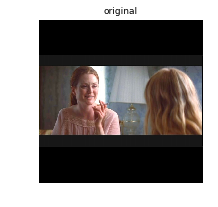

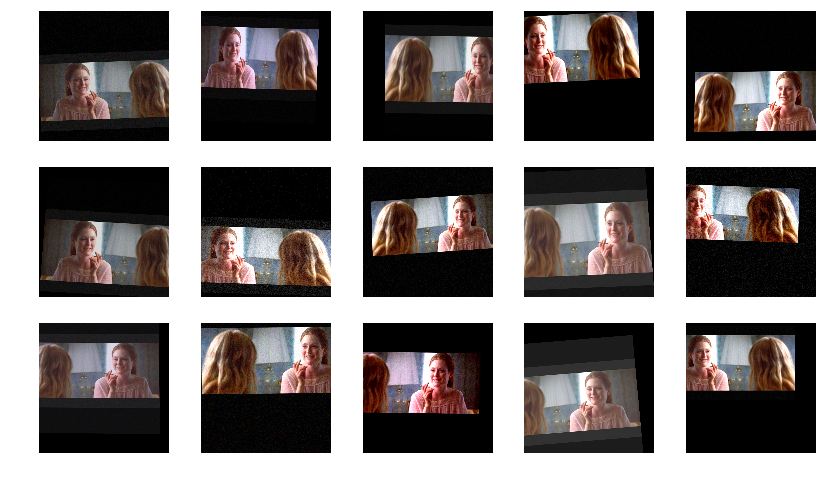

In [0]:
# Some example augmentations using the seq defined above.
display_images( [image], titles=['original'])

image_list = []
for i in range(15):
    image_aug = seq_of_aug.augment_image(image)
    image_list.append( image_aug)
    
display_images( image_list, cols=5)

mask                     shape: (56, 56, 1)           min:    0.00000  max:    1.00000  bool


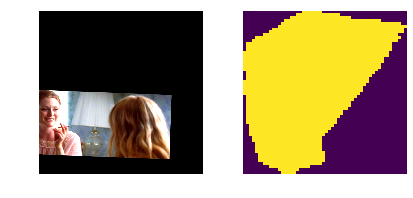

In [0]:
# Add augmentation and mask resizing.
image, image_meta, class_ids, bbox, mask = modellib.load_image_gt(
    dataset, config, image_id, augmentation=seq_of_aug, use_mini_mask=True)
log("mask", mask)
display_images([image]+[mask[:,:,i] for i in range(min(mask.shape[-1], 7))])

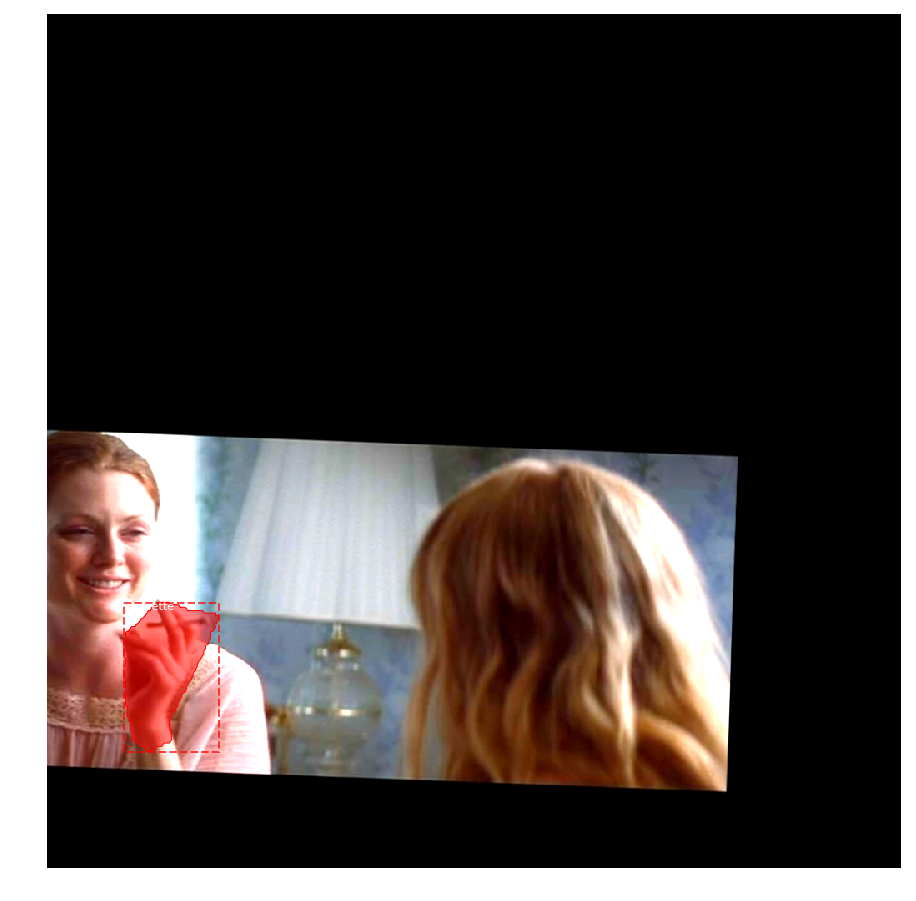

In [0]:

mask = utils.expand_mask(bbox, mask, image.shape)
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)

In [0]:
# Generate Anchors
backbone_shapes = modellib.compute_backbone_shapes(config, config.IMAGE_SHAPE)
anchors = utils.generate_pyramid_anchors(config.RPN_ANCHOR_SCALES, 
                                          config.RPN_ANCHOR_RATIOS,
                                          backbone_shapes,
                                          config.BACKBONE_STRIDES, 
                                          config.RPN_ANCHOR_STRIDE)

# Print summary of anchors
num_levels = len(backbone_shapes)
anchors_per_cell = len(config.RPN_ANCHOR_RATIOS)
print("Count: ", anchors.shape[0])
print("Scales: ", config.RPN_ANCHOR_SCALES)
print("ratios: ", config.RPN_ANCHOR_RATIOS)
print("Anchors per Cell: ", anchors_per_cell)
print("Levels: ", num_levels)
anchors_per_level = []
for l in range(num_levels):
    num_cells = backbone_shapes[l][0] * backbone_shapes[l][1]
    anchors_per_level.append(anchors_per_cell * num_cells // config.RPN_ANCHOR_STRIDE**2)
    print("Anchors in Level {}: {}".format(l, anchors_per_level[l]))

Count:  261888
Scales:  (32, 64, 128, 256, 512)
ratios:  [0.5, 1, 2]
Anchors per Cell:  3
Levels:  5
Anchors in Level 0: 196608
Anchors in Level 1: 49152
Anchors in Level 2: 12288
Anchors in Level 3: 3072
Anchors in Level 4: 768


Level 0. Anchors: 196608  Feature map Shape: [256 256]
Level 1. Anchors:  49152  Feature map Shape: [128 128]
Level 2. Anchors:  12288  Feature map Shape: [64 64]
Level 3. Anchors:   3072  Feature map Shape: [32 32]
Level 4. Anchors:    768  Feature map Shape: [16 16]


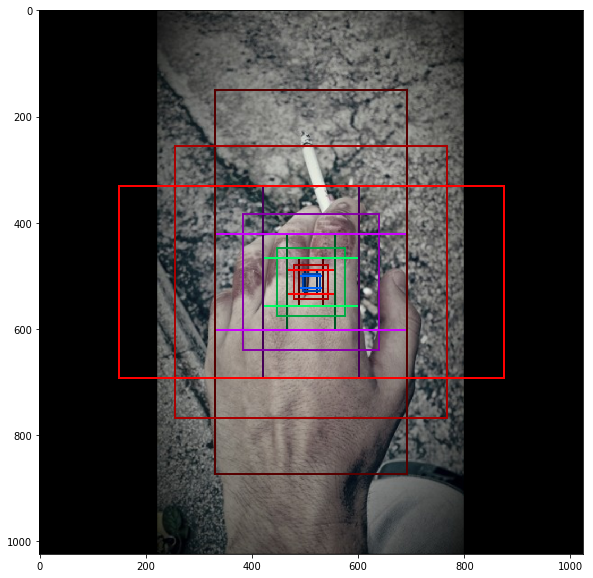

In [0]:

# Load and draw random image
image_id = np.random.choice(dataset.image_ids, 1)[0]
image, image_meta, _, _, _ = modellib.load_image_gt(dataset, config, image_id)
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.imshow(image)
levels = len(backbone_shapes)

for level in range(levels):
    colors = visualize.random_colors(levels)
    # Compute the index of the anchors at the center of the image
    level_start = sum(anchors_per_level[:level]) # sum of anchors of previous levels
    level_anchors = anchors[level_start:level_start+anchors_per_level[level]]
    print("Level {}. Anchors: {:6}  Feature map Shape: {}".format(level, level_anchors.shape[0], 
                                                                  backbone_shapes[level]))
    center_cell = backbone_shapes[level] // 2
    center_cell_index = (center_cell[0] * backbone_shapes[level][1] + center_cell[1])
    level_center = center_cell_index * anchors_per_cell 
    center_anchor = anchors_per_cell * (
        (center_cell[0] * backbone_shapes[level][1] / config.RPN_ANCHOR_STRIDE**2) \
        + center_cell[1] / config.RPN_ANCHOR_STRIDE)
    level_center = int(center_anchor)

    # Draw anchors. Brightness show the order in the array, dark to bright.
    for i, rect in enumerate(level_anchors[level_center:level_center+anchors_per_cell]):
        y1, x1, y2, x2 = rect
        p = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=2, facecolor='none',
                              edgecolor=(i+1)*np.array(colors[level]) / anchors_per_cell)
        ax.add_patch(p)

In [0]:
# Create data generator
random_rois = 2000
g = modellib.data_generator(
    dataset, config, shuffle=True, random_rois=random_rois, 
    batch_size=4,
    detection_targets=True,
    \
    augmentation=seq_of_aug
    )

In [0]:
# Get Next Image
if random_rois:
    [normalized_images, image_meta, rpn_match, rpn_bbox, gt_class_ids, gt_boxes, gt_masks, rpn_rois, rois], \
    [mrcnn_class_ids, mrcnn_bbox, mrcnn_mask] = next(g)
    
    log("rois", rois)
    log("mrcnn_class_ids", mrcnn_class_ids)
    log("mrcnn_bbox", mrcnn_bbox)
    log("mrcnn_mask", mrcnn_mask)
else:
    [normalized_images, image_meta, rpn_match, rpn_bbox, gt_boxes, gt_masks], _ = next(g)
    
log("gt_class_ids", gt_class_ids)
log("gt_boxes", gt_boxes)
log("gt_masks", gt_masks)
log("rpn_match", rpn_match, )
log("rpn_bbox", rpn_bbox)
image_id = modellib.parse_image_meta(image_meta)["image_id"][0]
print("image_id: ", image_id, dataset.image_reference(image_id))

# Remove the last dim in mrcnn_class_ids. It's only added
# to satisfy Keras restriction on target shape.
mrcnn_class_ids = mrcnn_class_ids[:,:,0]

rois                     shape: (4, 200, 4)           min:    0.00000  max: 1023.00000  int32
mrcnn_class_ids          shape: (4, 200, 1)           min:    0.00000  max:    1.00000  int32
mrcnn_bbox               shape: (4, 200, 2, 4)        min:   -3.44072  max:    3.73711  float32
mrcnn_mask               shape: (4, 200, 28, 28, 2)   min:    0.00000  max:    1.00000  float32
gt_class_ids             shape: (4, 100)              min:    0.00000  max:    1.00000  int32
gt_boxes                 shape: (4, 100, 4)           min:    0.00000  max: 1024.00000  int32
gt_masks                 shape: (4, 56, 56, 100)      min:    0.00000  max:    1.00000  bool
rpn_match                shape: (4, 261888, 1)        min:   -1.00000  max:    1.00000  int32
rpn_bbox                 shape: (4, 256, 4)           min:   -2.25714  max:    1.81641  float64
image_id:  666 /content/gdrive/My Drive/big_project/images//cigarette_images/cigarette_0263.jpg


anchors                  shape: (261888, 4)           min: -362.03867  max: 1322.03867  float64
refined_anchors          shape: (4, 4)                min:   12.00000  max:  646.00000  float32
Positive anchors: 4
Negative anchors: 252
Neutral anchors: 261632
BG                     : 162
cigarette              : 38


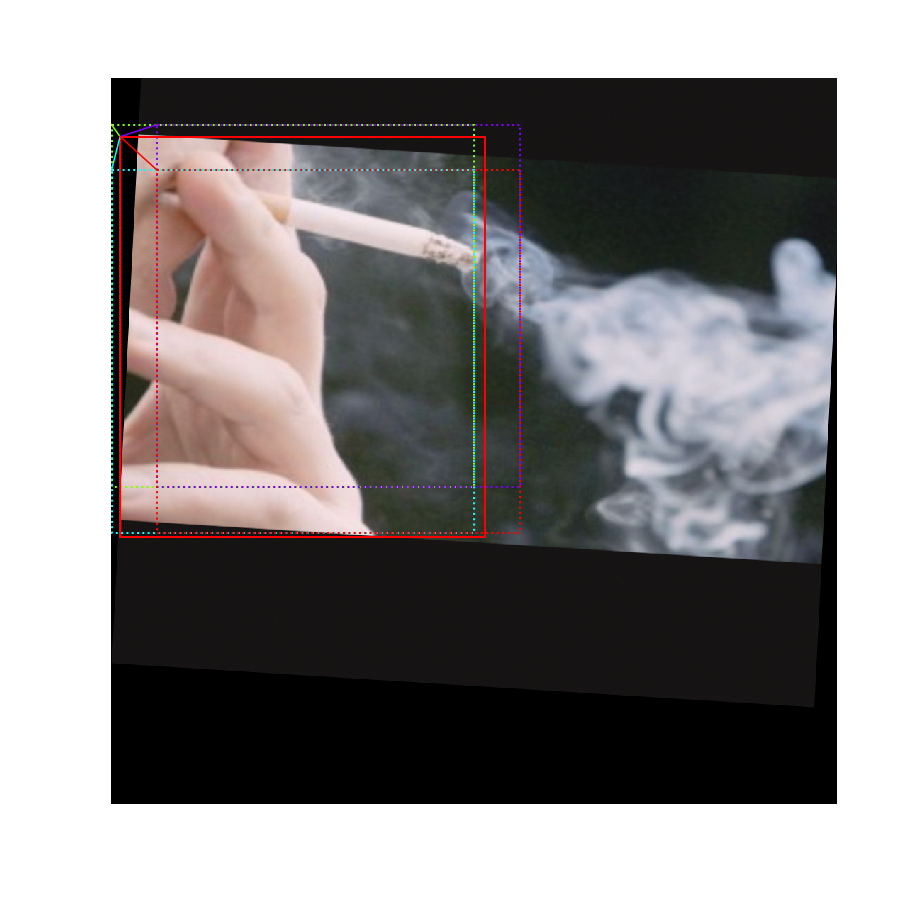

In [0]:
b = 0

# Restore original image (reverse normalization)
sample_image = modellib.unmold_image(normalized_images[b], config)

# Compute anchor shifts.
indices = np.where(rpn_match[b] == 1)[0]
refined_anchors = utils.apply_box_deltas(anchors[indices], rpn_bbox[b, :len(indices)] * config.RPN_BBOX_STD_DEV)
log("anchors", anchors)
log("refined_anchors", refined_anchors)

# Get list of positive anchors
positive_anchor_ids = np.where(rpn_match[b] == 1)[0]
print("Positive anchors: {}".format(len(positive_anchor_ids)))
negative_anchor_ids = np.where(rpn_match[b] == -1)[0]
print("Negative anchors: {}".format(len(negative_anchor_ids)))
neutral_anchor_ids = np.where(rpn_match[b] == 0)[0]
print("Neutral anchors: {}".format(len(neutral_anchor_ids)))

# ROI breakdown by class
for c, n in zip(dataset.class_names, np.bincount(mrcnn_class_ids[b].flatten())):
    if n:
        print("{:23}: {}".format(c[:20], n))

# Show positive anchors
fig, ax = plt.subplots(1, figsize=(16, 16))
visualize.draw_boxes(sample_image, boxes=anchors[positive_anchor_ids], 
                     refined_boxes=refined_anchors, ax=ax)

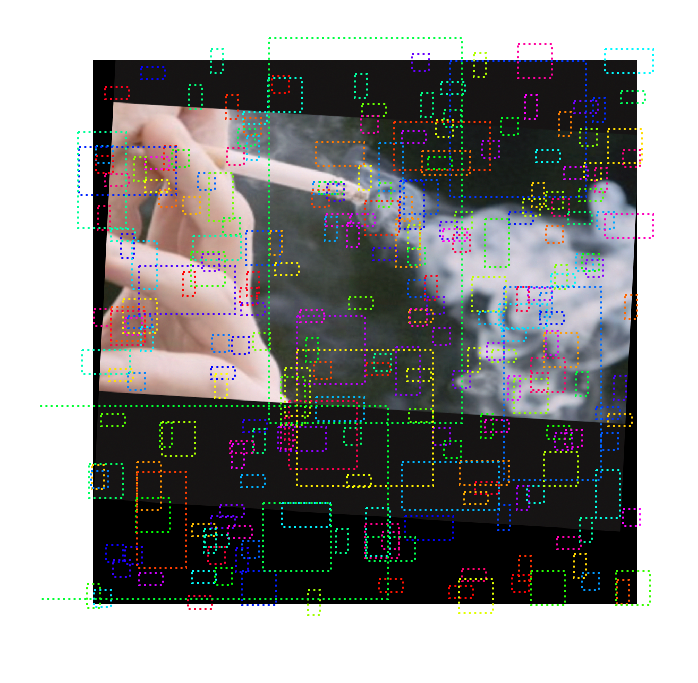

In [0]:
# Show negative anchors
visualize.draw_boxes(sample_image, boxes=anchors[negative_anchor_ids])



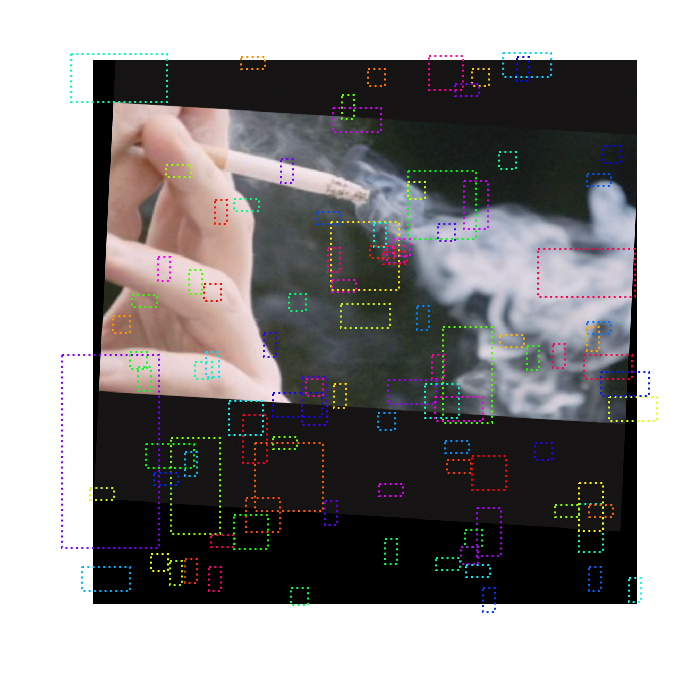

In [0]:
# Show neutral anchors. They don't contribute to training.
visualize.draw_boxes(sample_image, boxes=anchors[np.random.choice(neutral_anchor_ids, 100)])

Positive ROIs:  38
Negative ROIs:  162
Positive Ratio: 0.19
Unique ROIs: 200 out of 200


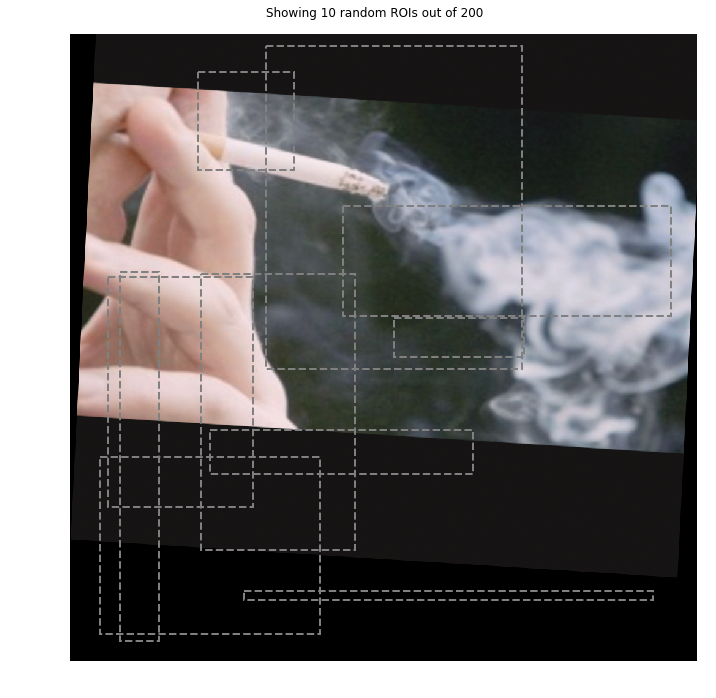

In [0]:
if random_rois:
    # Class aware bboxes
    bbox_specific = mrcnn_bbox[b, np.arange(mrcnn_bbox.shape[1]), mrcnn_class_ids[b], :]

    # Refined ROIs
    refined_rois = utils.apply_box_deltas(rois[b].astype(np.float32), bbox_specific[:,:4] * config.BBOX_STD_DEV)

    # Class aware masks
    mask_specific = mrcnn_mask[b, np.arange(mrcnn_mask.shape[1]), :, :, mrcnn_class_ids[b]]

    visualize.draw_rois(sample_image, rois[b], refined_rois, mask_specific, mrcnn_class_ids[b], dataset.class_names)
    
    # Any repeated ROIs?
    rows = np.ascontiguousarray(rois[b]).view(np.dtype((np.void, rois.dtype.itemsize * rois.shape[-1])))
    _, idx = np.unique(rows, return_index=True)
    print("Unique ROIs: {} out of {}".format(len(idx), rois.shape[1]))

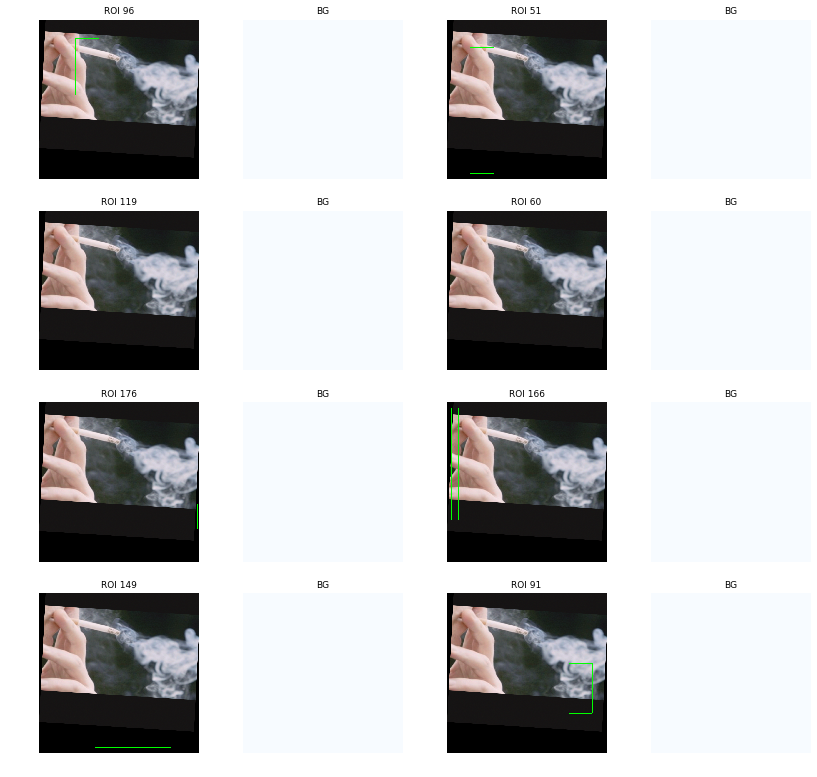

In [0]:
if random_rois:
    # Dispalay ROIs and corresponding masks and bounding boxes
    ids = random.sample(range(rois.shape[1]), 8)

    images = []
    titles = []
    for i in ids:
        image = visualize.draw_box(sample_image.copy(), rois[b,i,:4].astype(np.int32), [255, 0, 0])
        image = visualize.draw_box(image, refined_rois[i].astype(np.int64), [0, 255, 0])
        images.append(image)
        titles.append("ROI {}".format(i))
        images.append(mask_specific[i] * 255)
        titles.append(dataset.class_names[mrcnn_class_ids[b,i]][:20])

    display_images(images, titles, cols=4, cmap="Blues", interpolation="none")

In [0]:
# Check ratio of positive ROIs in a set of images.
if random_rois:
    limit = 10
    temp_g = modellib.data_generator(
        dataset, config, shuffle=True, random_rois=10000, 
        batch_size=1, detection_targets=True)
    total = 0
    for i in range(limit):
        _, [ids, _, _] = next(temp_g)
        positive_rois = np.sum(ids[0] > 0)
        total += positive_rois
        print("{:5} {:5.2f}".format(positive_rois, positive_rois/ids.shape[1]))
    print("Average percent: {:.2f}".format(total/(limit*ids.shape[1])))

   66  0.33
   66  0.33
   66  0.33
   66  0.33
   66  0.33
   66  0.33
   66  0.33
   66  0.33
   66  0.33
   66  0.33
Average percent: 0.33


In [18]:
print("dataset dir:", dataset_path)
print("modesl dir:", models_dir)

dataset dir: /content/gdrive/My Drive/big_project/images/
modesl dir: /content/gdrive/My Drive/big_project/Mask_RCNN/models/


In [19]:
# Setup configuration
config = det.DetConfig('cigarette', ['cigarette'])
config.ACTIVATION = 'leakyrelu'
config.display()


Configurations:
ACTIVATION                     leakyrelu
ALL_CLASS_NAMES                ['BG', 'cigarette']
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     2
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
CLASS_NAMES                    ['cigarette']
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.5
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 2
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_l

In [20]:
# Create the model
model = modellib.MaskRCNN(mode='training', 
                          config=config,
                          model_dir=models_dir)

model.keras_model.summary()

W0813 05:58:40.246811 140666824701824 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0813 05:58:40.295057 140666824701824 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0813 05:58:40.351357 140666824701824 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1919: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

W0813 05:58:40.356279 140666824701824 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0813 05:58:43.819243 140666824701824 deprecation

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_image (InputLayer)        (None, None, None, 3 0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, None, None, 3 0           input_image[0][0]                
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNorm)            (None, None, None, 6 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [21]:
# Load the weights

# Local path to trained weights file

#### 수정한 부분 - 주석처리
# COCO_MODEL_PATH = os.path.join(models_dir, "mask_rcnn_coco.h5")
####

PAST_WEIGHT_PATH = os.path.join(models_dir, "cigarette20190812T0807/mask_rcnn_cigarette_0079.h5")
# Download COCO trained weights from Releases if needed
#### 수정한 부분 - 주석처리
#if not os.path.exists(COCO_MODEL_PATH):
#    utils.download_trained_weights(COCO_MODEL_PATH)
#else:
#    print("using existing ", COCO_MODEL_PATH)
#### 

# For the coco dataset exclude the last layers because 
# it requires a matching number of classes
print("loading...", end='')
model.load_weights(PAST_WEIGHT_PATH, by_name=True, exclude=[
    "mrcnn_class_logits", "mrcnn_bbox_fc",
    "mrcnn_bbox", "mrcnn_mask"])

print("loaded.")

loading...Re-starting from epoch 79
loaded.


In [0]:
def train(model, dataset_path, epochs=10):
    """Train the model."""
    use_multiprocessing=True
    
    # Create the train and val dataset.
    dataset_train, dataset_val = det.create_datasets(dataset_path+'/cigarette_images', config)

    # Prepare them
    dataset_train.prepare()
    dataset_val.prepare()

    # Experiment with training options.
    # Since we're using a very small dataset, and starting from
    # COCO trained weights, we don't need to train too long. Also,
    # no need to train all layers, just the heads should do it.
    print("Training network heads")
    history = model.train(dataset_train, dataset_val,
                learning_rate=config.LEARNING_RATE,
                epochs=epochs,
                layers='all',
                augmentation=seq_of_aug, custom_callbacks=[TensorBoardColabCallback(tbc)]
                )
    
    return history

In [25]:
history = train(model, dataset_path, 100)

region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 

W0813 06:00:57.462712 140666824701824 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/gradients_util.py:93: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Co

Epoch 80/100
100/100 [==============================] - 557s 6s/step - loss: 0.8739 - rpn_class_loss: 0.0136 - rpn_bbox_loss: 0.2715 - mrcnn_class_loss: 0.1392 - mrcnn_bbox_loss: 0.2505 - mrcnn_mask_loss: 0.1991 - val_loss: 0.5611 - val_rpn_class_loss: 0.0028 - val_rpn_bbox_loss: 0.1862 - val_mrcnn_class_loss: 0.0255 - val_mrcnn_bbox_loss: 0.1493 - val_mrcnn_mask_loss: 0.1973
Epoch 81/100
100/100 [==============================] - 424s 4s/step - loss: 0.6031 - rpn_class_loss: 0.0034 - rpn_bbox_loss: 0.2151 - mrcnn_class_loss: 0.0269 - mrcnn_bbox_loss: 0.1405 - mrcnn_mask_loss: 0.2172 - val_loss: 0.4704 - val_rpn_class_loss: 0.0012 - val_rpn_bbox_loss: 0.1641 - val_mrcnn_class_loss: 0.0182 - val_mrcnn_bbox_loss: 0.1264 - val_mrcnn_mask_loss: 0.1604
Epoch 82/100
100/100 [==============================] - 427s 4s/step - loss: 0.6293 - rpn_class_loss: 0.0052 - rpn_bbox_loss: 0.2836 - mrcnn_class_loss: 0.0241 - mrcnn_bbox_loss: 0.1267 - mrcnn_mask_loss: 0.1896 - val_loss: 0.4900 - val_rpn_c

In [26]:
class InferenceConfig(det.DetConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
#    NUM_CLASSES = 2 # For BG + Others

    DETECTION_MIN_CONFIDENCE = 0.9
    
inf_config = InferenceConfig('cigarette', ['cigarette'])
inf_model = modellib.MaskRCNN(mode="inference", 
                              config=inf_config,
                              model_dir=models_dir)

inf_config.display()

# Find last trained weights
#weights_path = inf_model.find_last()[1]

# When testing use the latest, for demo use stable model
weights_path = os.path.join(models_dir, "cigarette20190812T0807/mask_rcnn_cigarette_0099.h5")
# weights_path = os.path.join(models_dir, "wolf20180516T0136_mask_rcnn_wolf_0075.h5")


print("Using latest weights: ", weights_path)

inf_model.load_weights(weights_path, by_name=True)

W0813 08:37:55.085530 140666824701824 deprecation_wrapper.py:119] From /content/gdrive/My Drive/big_project/Mask_RCNN/mrcnn/model.py:720: The name tf.sets.set_intersection is deprecated. Please use tf.sets.intersection instead.

W0813 08:37:55.226514 140666824701824 deprecation.py:323] From /content/gdrive/My Drive/big_project/Mask_RCNN/mrcnn/model.py:772: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.cast` instead.



Configurations:
ACTIVATION                     relu
ALL_CLASS_NAMES                ['BG', 'cigarette']
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
CLASS_NAMES                    ['cigarette']
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss':

In [0]:
import glob

def detect_instance(class_names, image_test_dir):
    """
    class_names: list of class names of the dataset
    image_filenames: list of images to analyze
    """

    det_filenames = sorted(glob.glob(image_test_dir+'/*'))

    for f in det_filenames:
        print("Processing image {}".format(f))

        test_img = plt.imread(f)
        print(test_img.shape)

        plt.imshow(test_img)
        # visualize.display_images([test_img])

        # Included in the results from detect are the found:
        # class_ids,their scores and masks.
        results = inf_model.detect([test_img], verbose=1)[0]

        print("Objects detected: ", len(results['class_ids']))

        # Visualize results
        visualize.display_instances(test_img, 
                                    results['rois'], 
                                    results['masks'], 
                                    results['class_ids'], 
                                    class_names, 
                                    results['scores'])

        print(results['class_ids'])

In [0]:
import math

def detect_instances(class_names, image_test_dir):
    """
    class_names: list of class names of the dataset
    image_filenames: list of images to analyze
    """
        
    det_filenames = sorted(glob.glob(image_test_dir+'/*'))

    fig = plt.figure(figsize=(16,10))

    n_cols = 3
    n_rows = math.ceil(len(det_filenames) / n_cols) 
    
    
    for i, f in enumerate(det_filenames):
        
        print("Processing image {}".format(f))
        
        ax = plt.subplot( n_rows, n_cols, i+1)

        test_img = plt.imread(f)

        # Included in the results from detect are the found:
        # class_ids,their scores and masks.
        results = inf_model.detect([test_img], verbose=1)[0]

        print("Objects detected: ", len(results['class_ids']))

        # Visualize results
        visualize.display_instances(test_img, 
                                    results['rois'], 
                                    results['masks'], 
                                    results['class_ids'], 
                                    class_names, 
                                    results['scores'],
                                    ax=ax)

        print(results['class_ids'])

In [29]:
image_test_dir = os.path.join(ROOT_IMAGE_DIR, "test/")

r = detect_instances(inf_config.ALL_CLASS_NAMES, image_test_dir)

<Figure size 1152x720 with 0 Axes>

In [30]:
_, dataset_val = det.create_datasets(dataset_path+'/cigarette_images', inf_config)
dataset_val.prepare()

region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 'dict'>
region:  <class 

In [0]:
# Compute VOC-Style mAP @ IoU=0.5

# Run on a subset.
#n_image_ids = max(20, len(dataset_val.image_ids))
#image_ids = np.random.choice(dataset_val.image_ids, n_image_ids)
image_ids = dataset_val.image_ids
APs = []

In [32]:
for image_id in image_ids:
    # Load image and ground truth data
    image, image_meta, gt_class_id, gt_bbox, gt_mask =\
        modellib.load_image_gt(dataset_val, inf_config,
                               image_id, use_mini_mask=False)
    molded_images = np.expand_dims(modellib.mold_image(image, inf_config), 0)
    # Run object detection
    results = inf_model.detect([image], verbose=0)
    r = results[0]
    # Compute AP
    AP, precisions, recalls, overlaps =\
        utils.compute_ap(gt_bbox, gt_class_id, gt_mask,
                         r["rois"], r["class_ids"], r["scores"], r['masks'])
    print(image_id, AP)
    APs.append(AP)
    
print("mAP: {:.4f}".format(np.mean(APs)))

0 1.0
1 1.0
2 1.0
3 1.0
4 1.0
5 1.0
6 0.5
7 1.0
8 0.0
9 1.0
10 1.0
11 1.0
12 1.0
13 1.0
14 1.0
15 1.0
16 1.0
17 1.0
18 1.0
19 1.0
20 1.0
21 1.0
22 1.0
23 1.0
24 0.5
25 1.0
26 1.0
27 1.0
28 0.5
29 1.0
30 1.0
31 1.0
32 1.0
33 1.0
34 1.0
35 1.0
36 1.0
37 1.0
38 1.0
39 1.0
40 1.0
41 1.0
42 1.0
43 1.0
44 1.0
45 1.0
46 1.0
47 1.0
48 1.0
49 1.0
50 1.0
51 1.0
52 1.0
53 1.0
54 1.0
55 1.0
56 0.0
57 1.0
58 1.0
59 1.0
60 1.0
61 1.0
62 1.0
63 1.0
64 1.0
65 1.0
66 1.0
67 1.0
68 0.5
69 1.0
70 1.0
71 1.0
72 1.0
73 1.0
74 1.0
75 1.0
76 1.0
77 1.0
78 1.0
79 1.0
80 0.0
81 1.0
82 1.0
83 1.0
84 1.0
85 1.0
86 1.0
87 1.0
88 1.0
89 1.0
90 1.0
91 1.0
92 1.0
93 1.0
94 1.0
95 1.0
96 1.0
97 1.0
98 1.0
99 1.0
100 1.0
101 1.0
102 1.0
103 0.0
104 1.0
105 1.0
106 1.0
107 1.0
108 1.0
109 1.0
110 1.0
111 1.0
112 1.0
113 1.0
114 1.0
115 1.0
116 1.0
117 1.0
118 1.0
119 1.0
120 1.0
121 0.5
122 1.0
123 1.0
124 1.0
125 1.0
126 1.0
127 1.0
128 1.0
129 1.0
130 1.0
131 1.0
132 1.0
133 1.0
134 1.0
135 1.0
136 1.0
137 1.0
138 0.

In [0]:
image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset_val, inf_config, 12, use_mini_mask=False)

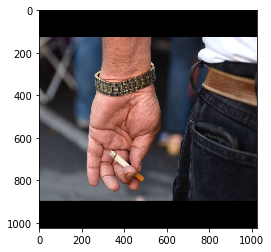

In [52]:
plt.imshow(image)

Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Objects detected:  1


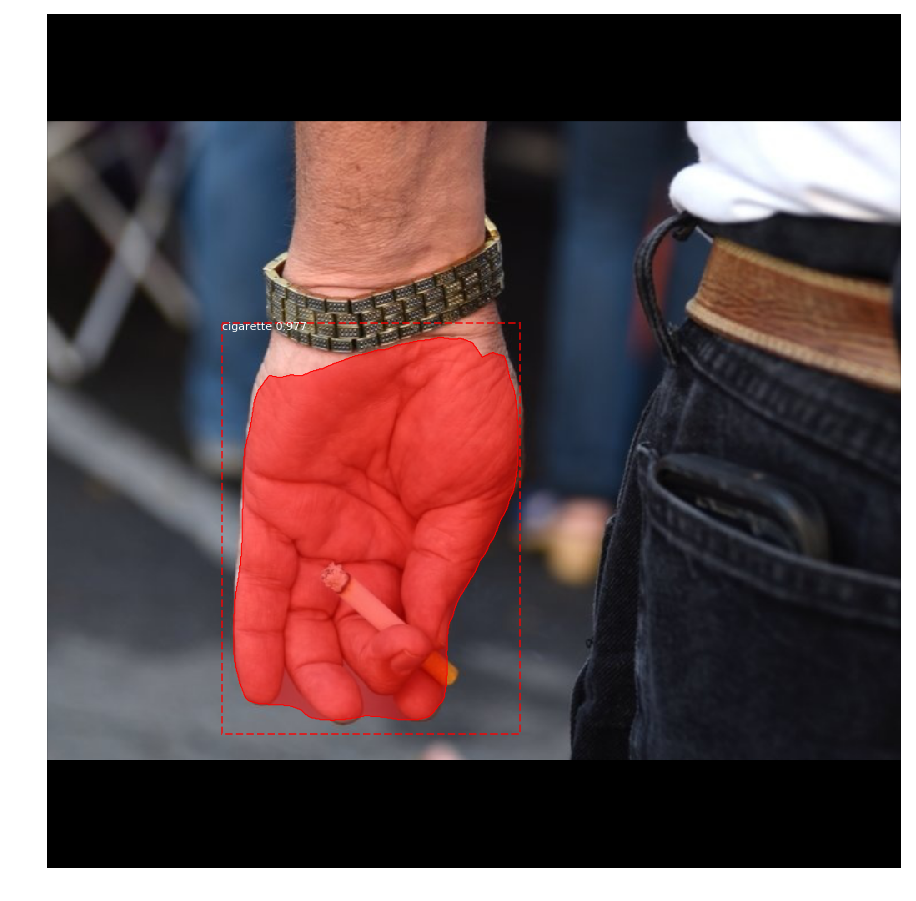

[1]


In [53]:
# Included in the results from detect are the found:
# class_ids,their scores and masks.
results = inf_model.detect([image], verbose=1)[0]

print("Objects detected: ", len(results['class_ids']))

# Visualize results
visualize.display_instances(image, 
                            results['rois'], 
                            results['masks'], 
                            results['class_ids'], 
                            inf_config.ALL_CLASS_NAMES, 
                            results['scores'])
print(results['class_ids'])